In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [7]:
#Exploring categories
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

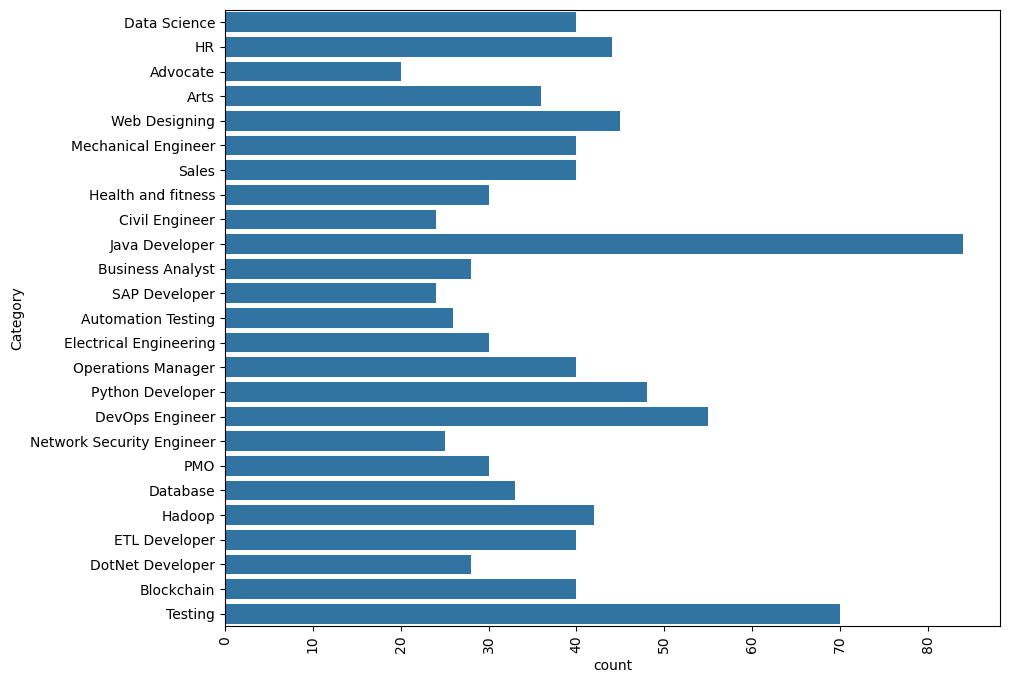

In [25]:
#plot the category data
plt.figure(figsize=(10,8))
sns.countplot(df.Category)
plt.xticks(rotation=90)
plt.show()

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

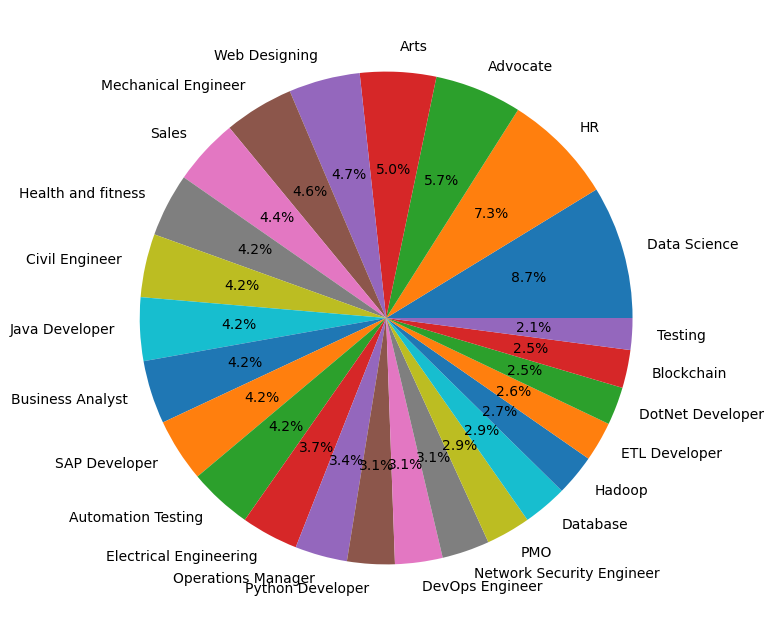

In [9]:
#lets plot pie chart of labels vs category count
counts=df.Category.value_counts()
labels=df.Category.unique()
plt.figure(figsize=(10,8))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
import warnings
warnings.filterwarnings

In [15]:
#Exploring Resume
df.Category[10]

'Data Science'

In [142]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [150]:
df.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [17]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
#Cleaning the Data
URL's
Hashtags
Mentions
Special Letters
Punctuations


In [27]:
import re
def cleanResume(txt):
    cleanText= re.sub(r"http\S+\s"," ",txt)
    cleanText= re.sub(r"RT|cc"," ",cleanText)
    cleanText= re.sub(r"#\S+\s"," ",cleanText)
    cleanText= re.sub(r"@\S+"," ",cleanText)
    cleanText= re.sub(r"[%s]" % re.escape("""!"#@$%^&*()_~:|;[]{}/?<>+=-""")," ",cleanText)
    cleanText= re.sub(r'[^\x00-\x7f]'," ",cleanText)
    cleanText= re.sub(r"\s+"," ",cleanText)
    return cleanText
   

In [33]:
df["Resume"]=df["Resume"].apply(lambda x: cleanResume(x))
df.Resume[0]

'Skills Programming Languages Python pandas, numpy, scipy, scikit learn, matplotlib , Sql, Java, JavaScript JQuery. Machine learning Regression, SVM, Na ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling LDA, NMF , PCA Neural Nets. Database Visualizations Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. Others Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision Open CV and understanding of Deep learning.Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technolog

In [35]:
#Now we can see that our data is cleaned
#lets do some preprocessing
#convert categorical data into numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


In [39]:
df["Category"]=lb.fit_transform(df["Category"])
df["Category"]

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [51]:
#now use TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf = TfidfVectorizer(stop_words="english")

In [68]:
newdf=tfidf.fit_transform(df["Resume"])

In [64]:
newdf

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [ ]:
#Splitting the data by using train test split


In [70]:
df

,Category,Resume
0,6,"Skills Programming Languages Python pandas, nu..."
1,6,Education Details May 2013 to May 2017 B.E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details MCA YMCAUST, Faridabad, Hary..."
...,...,...
957,23,"Computer Skills Proficient in MS office Word, ..."
958,23,Willingness to a ept the challenges. Positive...
959,23,"PERSONAL SKILLS Quick learner, Eagerness to le..."
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [72]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(newdf,df["Category"],test_size=0.2)

In [82]:
x_train.shape

(769, 7351)

In [86]:
x_test.shape

(193, 7351)

In [104]:
#now lets train the model and print classification report
#use k-Nearest Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [102]:
knn=OneVsRestClassifier(KNeighborsClassifier())

In [106]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [108]:
y_pred

array([ 8, 19, 20, 23, 18, 21,  5, 19, 23,  8,  6, 24, 20,  7, 21,  9, 21,
        7, 14, 10, 20, 23,  3,  5,  1, 18,  4, 15, 11, 12, 10, 12,  8, 15,
       11, 10, 18, 10, 20, 12, 21, 23,  7,  5, 10, 21, 12, 21, 19, 18,  3,
        8,  2, 20, 18, 22,  6, 20,  9,  9,  2,  1, 24,  9,  9, 10, 16, 15,
       22, 10, 24, 15, 22,  1, 10, 11, 15,  8, 24, 14,  7, 11,  1,  3, 24,
       15, 16,  0, 20, 23,  9,  6, 13, 24,  7, 18, 20, 22, 16,  9,  3, 15,
       12, 10, 23, 15,  1, 19, 20, 23, 13,  5, 16,  7,  8,  0, 17,  5,  9,
        3, 15, 21, 24, 12, 17, 13, 12, 14, 15, 18,  9, 18, 19, 15,  9, 16,
       15, 16, 23, 22,  7, 14,  8,  9, 22, 22,  8,  6, 20, 16, 16,  3,  3,
       16,  9, 19,  0, 15, 13,  8, 22, 12, 20, 19, 15, 17,  4,  3,  8, 12,
       13,  6,  8, 11, 16,  2, 13, 22, 19, 14, 17,  1, 24, 20,  0, 10, 13,
       21, 24, 15, 12,  8, 20], dtype=int64)

In [112]:
print(accuracy_score(y_test,y_pred)*100)

98.44559585492227


In [ ]:
#so the accuracy of our model is good
#lets create prediction system


In [120]:
import pickle
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(knn,open("knn.pkl","wb"))            


In [162]:
! pip freeze > requirements.txt file


In [156]:
myresume="""
AMIT PATEL  
Mumbai, Maharashtra  
+91 98XXXXXXXX  
amit.patel@email.com  
GitHub: github.com/amitpatel 

Professional Summary

 Recent Computer Science graduate with strong Java programming skills and hands-on experience in developing web applications. Proficient in Spring Framework and passionate about creating efficient, scalable solutions. 

Skills 

Java Programming 

Spring Boot 

RESTful APIs 

MySQL 

Git Version Control 

Basic DevOps knowledge 

Education 

Bachelor of Technology in Computer Science

Mumbai University | 2020-2024

CGPA: 8.5/10 

Projects 

E-Commerce Website  

Developed full-stack application using Spring Boot and React 

Implemented user authentication and payment gateway integration 

Utilized microservices architecture 

Student Management System  

Created CRUD application with Java Swing 

Implemented database connectivity using JDBC 

Certifications 

Oracle Certified Java Associate (OCJA) 

Introduction 

"""

 

In [158]:
#load trained classifier
knn = pickle.load(open("knn.pkl","rb"))

#clean the input resume
cleaned_resume = cleanResume(myresume)

#transfer the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

#make the predictions using the loaded Classifier
prediction_id = knn.predict(input_features)[0]

In [160]:
#map all category ID's and categories
category_mapping = {15:"Java Developer",
                    23:"Testing",
                    8:"Devops Engineer",
                    20:"Python Developer",
                    24:"Web Designing",
                    12:"HR",
                    13:"Hadoop",
                    3:"Blockchain",
                    10:"ETL Developer",
                    18:"Operations Manager",
                    6:"Data Science",
                    22:"Sales",
                    16:"Mechanical Engineering",
                    1:"Arts",
                    7:"Database",
                    11:"Electrical Engineering",
                    14:"Health and Fitness",
                    19:"PMO",
                    4:"Business Analyst",
                    9:"DotNet Developer",
                    2:"Automation Testing",
                    17:"Network Security Engineer",
                    21:"SAP Developer",
                    5:"Civil Engineer",
                    0:"Advocate",
                   }
category_name = category_mapping.get(prediction_id,"unknown")
print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Java Developer
15
